In [1]:
import glob
from pathlib import Path
from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def count_total_proportion_infected(dataframe):
    return 1 - dataframe.apply(lambda x: x.value_counts(normalize = True), axis = 1).fillna(0).iloc[-1]['susceptible']

def count_time_clear_infection(dataframe):
    return len(dataframe)

def count_time_max_infection(dataframe):
    return dataframe.apply(lambda x: x.value_counts(normalize = True), axis = 1).fillna(0)['infected'].idxmax()


In [3]:
def generate_results():
    graph_names = ['lattice', 'random', 'watts_strogatz', 'barabasi_albert']
    ps = np.linspace(0, 1, 21)
    general_results = []

    for p, graph_name in product(ps, graph_names):
        local_results = []
        for file in glob.glob(f'results/d/{graph_name}/p-{p}/*.csv'):
            df = pd.read_csv(file)
            local_results.append(pd.DataFrame({
                'total_proportion_infected': [count_total_proportion_infected(df)],
                'time_clear_infection': [count_time_clear_infection(df)],
                'time_max_infection': [count_time_max_infection(df)],
            }))
        local_results = pd.concat(local_results)
        local_results['p'] = p
        local_results['graph_name'] = graph_name
        general_results.append(local_results)
    general_results = pd.concat(general_results)
    return general_results

In [4]:
# results = generate_results()

In [9]:
# results.to_csv('results.csv', index=False)

In [ ]:
results = pd.read_csv('results/results.csv')

# Task D

The setup of experiminet is very similary to the one from task B. I've used 1000 steps of simulations and random starting point. 

### Total propotion  of  the  network  that  becomes  infected

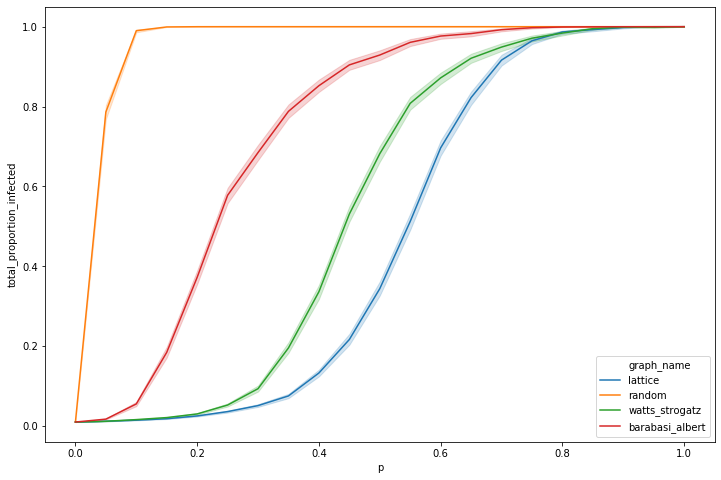

In [10]:
plt.figure(figsize = (12, 8))

_ = sns.lineplot(
    data = results, 
    x = 'p', 
    y = 'total_proportion_infected', 
    hue = 'graph_name'
)

### Time  to  clear infection

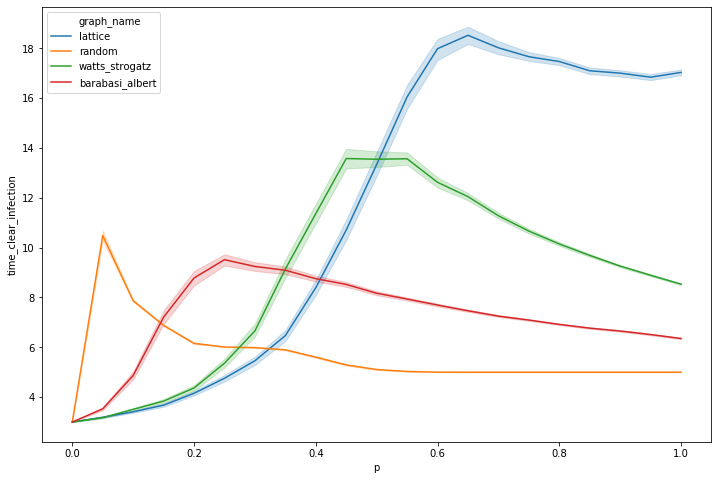

In [11]:
plt.figure(figsize = (12, 8))

_ = sns.lineplot(
    data = results, 
    x = 'p', 
    y = 'time_clear_infection', 
    hue = 'graph_name'
)

### Time to the largest number of infected nodes

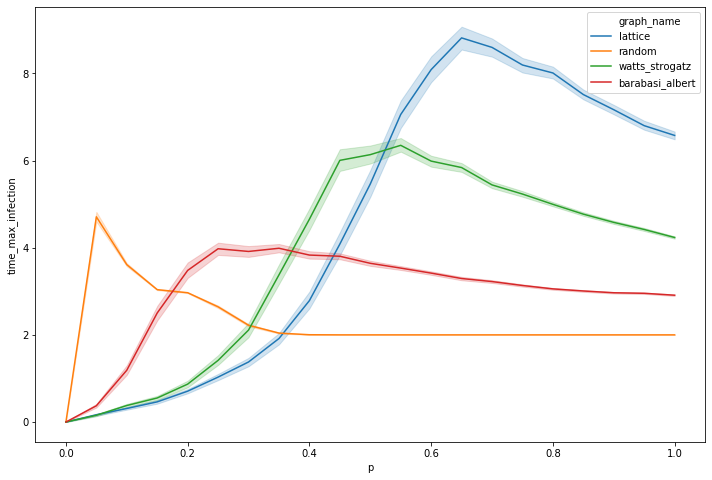

In [12]:
plt.figure(figsize = (12, 8))

_ = sns.lineplot(
    data = results, 
    x = 'p', 
    y = 'time_max_infection', 
    hue = 'graph_name'
)

# Task E

##### Total propotion  of  the  network  that  becomes  infected 
This measure tell us in which combination of p and network topology is there possibility to infect the whole network. As we can see on the image the most probable is random graph which even on low probability $p$ has high risk to infect all nodes in the network. It may be caused by the fact that random graphs are highly connected so the desease can rapidly spread. As we go further with less conected network topologies the higer probability of spreading desease must be reached to get whole network infected. I would also say that the shape of the curves can tell us a little bit. For example for random network the small increase in probability $p$ generates higher value of statistic and by going to next topologies the shape is more convex and this means that these topologies are more robust to sensitive changes in parameter $p$ (which for example in case of deseases may be good for us).

##### Time  to  clear infection
This measure tell us how fast the desease will end. My intuition for that it should have paraboloid shape becasue for small $p$ there won't be epidemy so the desease will naturaly die fast and for high $p$ there will be epidemy so everybody will be sick and this will also end the process. The maxium of this function should be somewhere in between. 

##### Time to the largest number of infected nodes
This measure tell us when will be the peak of the desease. The shape and interpretation is very similary to 'Time to clear infection' because approximately the maxium of this function is in the halfway of the whole desease so the shape will remain the same and value should be half of previous value.